In [ ]:
import sys
if 'google.colab' in sys.modules:
    %pip install matplotlib seaborn opencv-python pandas

In [ ]:
import os
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from collections import Counter

In [21]:
DATASET_PATH = "/content/drive/MyDrive/original_data"  # Change this if needed
IMAGE_FOLDER = os.path.join(DATASET_PATH, "images")
LABEL_FOLDER = os.path.join(DATASET_PATH, "labels")

In [31]:
# Check if folders exist
if not os.path.exists(IMAGE_FOLDER) or not os.path.exists(LABEL_FOLDER):
    print("Error: Image or Label folder does not exist!")
else:
    print(f"Image folder: {IMAGE_FOLDER}")
    print(f"Label folder: {LABEL_FOLDER}")

Image folder: /content/drive/MyDrive/original_data/images

Label folder: /content/drive/MyDrive/original_data/labels

In [23]:
# Get all images and labels
image_files = glob(os.path.join(IMAGE_FOLDER, "*.png"))
label_files = glob(os.path.join(LABEL_FOLDER, "*.png"))  # Assuming labels are .txt files

# Count images and labels
num_images = len(image_files)
num_labels = len(label_files)

print(f"Total Images: {num_images}")
print(f"Total Labels: {num_labels}")

Total Images: 820
Total Labels: 820


In [32]:
image_names = {os.path.splitext(os.path.basename(f))[0] for f in image_files}
label_names = {os.path.splitext(os.path.basename(f))[0] for f in label_files}

missing_labels = image_names - label_names
missing_images = label_names - image_names

print(f"Images without animated versions: {len(missing_labels)}")
print(f"Animated images without originals: {len(missing_images)}")

Images without animated versions: 0

Animated images without originals: 0


📌 Displaying random image-label pairs:


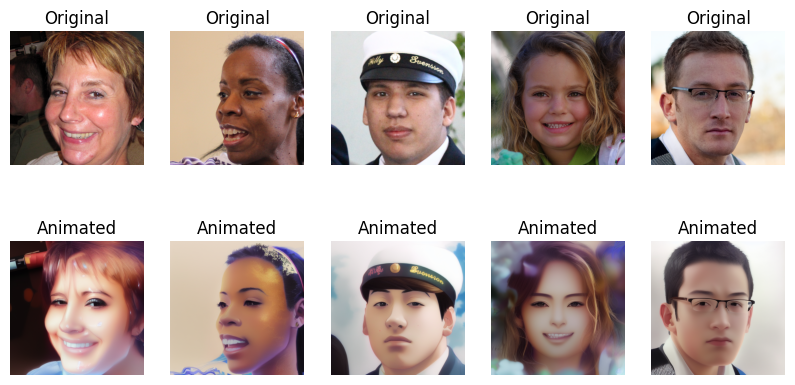

In [25]:
# Show a few sample images with their labels
def show_image_label_pairs(image_files, label_files, num_samples=5):
    plt.figure(figsize=(10, 5))

    # Pick random samples
    samples = np.random.choice(list(image_names & label_names), min(num_samples, len(image_names)), replace=False)

    for i, sample in enumerate(samples):
        img_path = os.path.join(IMAGE_FOLDER, sample + ".png")
        lbl_path = os.path.join(LABEL_FOLDER, sample + ".png")

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        lbl = cv2.imread(lbl_path)
        lbl = cv2.cvtColor(lbl, cv2.COLOR_BGR2RGB)

        plt.subplot(2, num_samples, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title("Original")

        plt.subplot(2, num_samples, i + 1 + num_samples)
        plt.imshow(lbl)
        plt.axis('off')
        plt.title("Animated")

    plt.show()

print("\n Displaying random image-label pairs:")
show_image_label_pairs(image_files, label_files, num_samples=5)


📏 BEFORE Preprocessing:
📏 Unique Image Sizes: {(1024, 1024)}
📏 Unique Label Sizes: {(512, 512)}
⚠️ Some images and labels have inconsistent sizes.

📏 AFTER Preprocessing:
📏 Unique Image Sizes: {(512, 512)}
📏 Unique Label Sizes: {(512, 512)}
✅ Now, all images and labels have matching sizes.
📂 Saved size distribution plot to ../image_size_distribution.png


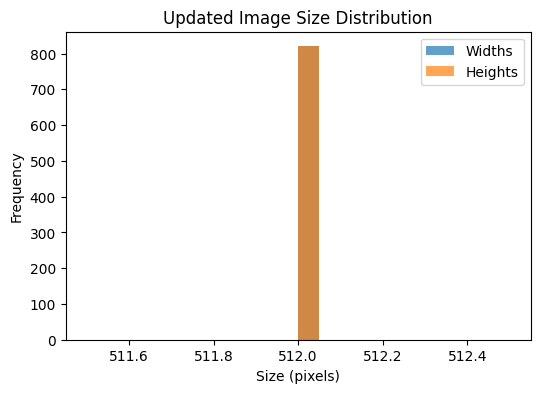

In [27]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Initial Image Size Analysis
image_shapes = [cv2.imread(f).shape[:2] for f in image_files]
label_shapes = [cv2.imread(f).shape[:2] for f in label_files]

image_sizes = set(image_shapes)
label_sizes = set(label_shapes)

print("\n📏 BEFORE Preprocessing:")
print(f"📏 Unique Image Sizes: {image_sizes}")
print(f"📏 Unique Label Sizes: {label_sizes}")

if image_sizes == label_sizes:
    print("✅ All images and labels have matching sizes.")
else:
    print("⚠️ Some images and labels have inconsistent sizes.")

# Step 2: Preprocess - Resize Images to Match Labels (512x512)
target_size = (512, 512)
for image_path in image_files:
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, target_size)  # Resize image to 512x512
    cv2.imwrite(image_path, image_resized)  # Overwrite original image

# Step 3: Image Size Analysis After Resizing
image_shapes_after = [cv2.imread(f).shape[:2] for f in image_files]
label_shapes_after = [cv2.imread(f).shape[:2] for f in label_files]

image_sizes_after = set(image_shapes_after)
label_sizes_after = set(label_shapes_after)

print("\n📏 AFTER Preprocessing:")
print(f"📏 Unique Image Sizes: {image_sizes_after}")
print(f"📏 Unique Label Sizes: {label_sizes_after}")

if image_sizes_after == label_sizes_after:
    print("✅ Now, all images and labels have matching sizes.")
else:
    print("⚠️ Some images and labels still have inconsistent sizes.")

# Step 4: Save Updated Size Distribution Plot
plt.figure(figsize=(6, 4))
widths, heights = zip(*image_shapes_after)
plt.hist(widths, bins=20, alpha=0.7, label="Widths")
plt.hist(heights, bins=20, alpha=0.7, label="Heights")
plt.xlabel("Size (pixels)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Updated Image Size Distribution")

output_path = "../image_size_distribution.png"
plt.savefig(output_path)
print(f"📂 Saved size distribution plot to {output_path}")

plt.show()
